<a href="https://colab.research.google.com/github/mohyunyang/My_Kaggle/blob/main/(Step1)Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle API 연동하기

In [ ]:
# API Token 다운받기
# 다운받은 API Token 업로드 하기
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yhyunmo","key":"8fdb7bbf0193b24d0178986819fcf478"}'}

In [ ]:
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 데이터셋 다운로드 받기 - 링크는 그 대회 'Data'에 있음
! kaggle competitions download -c bike-sharing-demand

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 38.7MB/s]


In [ ]:
# 다운로드 된 것들 다 보기 
!ls

bike-sharing-demand.zip  kaggle.json  sample_data


In [ ]:
# 필요하면 압축 풀기 
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


# 1. 데이터 둘러보기

In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- datatime ; 한 시간 간격 기록일시
- season ; 계절 ( 1:봄 , 2:여름, 3:가을, 4:겨울 )
- hoilday ; 공휴일 여부 ( 0 아님, 1 공휴일 )
- workingday ; 근무일 ( 0 : 근무아님, 1 : 근무일 )
- weather ; 날씨 ( 1 맑음, 2 옅은 안개, 3 약간의 눈비번개흐름, 4 폭우천둥번개눈안개) 숫자가 클 수록 날씨 bad
- temp ; 실제온도
- atemp ; 체감온도
- humidity ; 상대습도
- windspeed ; 풍속
- casual ; 비회원 수
- registered ; 회원 수
- count ; 자전거 대여 수량

In [ ]:
test.head() # casual	registered count 컬럼이 빠짐
# 테스트데이터니까 당연히 count는 제외됨, 분석결과 train 데이터와 컬럼을 맞추기위해 casual	registered 제외

In [ ]:
submission.head()

In [ ]:
train.info()  # 결측값 없음

In [ ]:
test.info() # 결측값 없음

# 2. 피처 엔지니어링

In [ ]:
print(train['datetime'][100]) # datatime 의 100번 째 원소
print(train['datetime'][100].split()) # 공백기준 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

In [ ]:
print(train['datetime'][100].split()[0].split('-'))
print(train['datetime'][100].split()[0].split('-')[0]) # 년
print(train['datetime'][100].split()[0].split('-')[1]) # 월
print(train['datetime'][100].split()[0].split('-')[2]) # 일

In [ ]:
print(train['datetime'][100].split()[1])
print(train['datetime'][100].split()[1].split(':'))
print(train['datetime'][100].split()[1].split(':')[0]) # 시
print(train['datetime'][100].split()[1].split(':')[1]) # 분
print(train['datetime'][100].split()[1].split(':')[2]) # 초

> 날짜 컬럼추출

In [ ]:
train['date'] = train['datetime'].apply(lambda x : x.split()[0])
train['date'].head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

> 년월일시분초 컬럼 만들기

In [ ]:
train['year'] = train['date'].apply(lambda x : x.split('-')[0]) # year
train['month'] = train['date'].apply(lambda x : x.split('-')[1]) # month
train['day'] = train['date'].apply(lambda x : x.split('-')[2]) # day
train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0]) # hour
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1]) # minute
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2]) # second

> 요일피처 생성

In [ ]:
from datetime import datetime
import calendar

print(train['date'][100]) # 날짜
print(type(train['date'][100])) # 타입확인

print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
print(type(datetime.strptime(train['date'][100], '%Y-%m-%d'))) # 타입확인

print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()]) # calendar.day_name['datetime타입으로 변경한 인자'.weekday()]

2011-01-05
<class 'str'>
2011-01-05 00:00:00
<class 'datetime.datetime'>
2
Wednesday


In [ ]:
train['weekday'] = train['date'].apply(lambda x : calendar.day_name[datetime.strptime(x, '%Y-%m-%d').weekday()])
train['weekday']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: weekday, Length: 10886, dtype: object

> map() 를 사용하여 season 과 weather 매핑하기

추후 시각화를 위해 

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [ ]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstorm',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


# 3. 데이터 시각화

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

> 분포도

displot()

In [ ]:
train.head()

In [ ]:
mpl.rc('font', size = 15)
sns.displot(train['count'])

In [ ]:
sns.displot(np.log(train['count'])) # 정규분포를 따르게 하기위해 로그변환

In [ ]:
print(np.log(train['count']).head())
print(train['count'].head())

> 막대그래프

barplot()


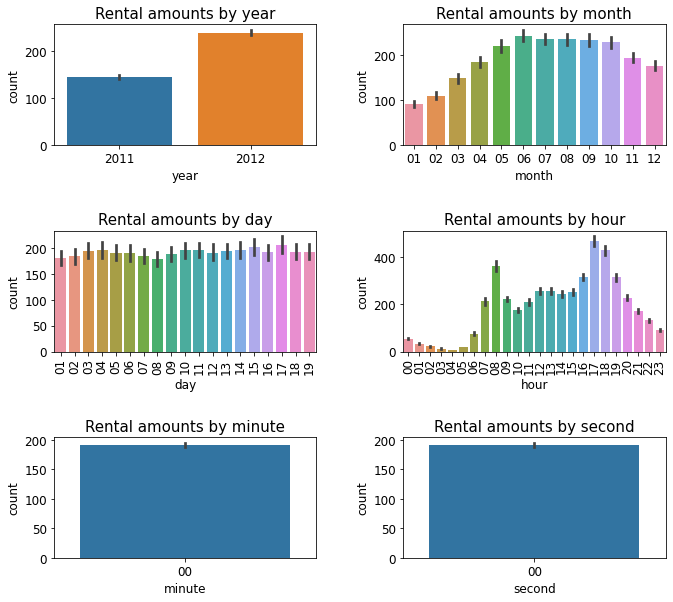

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size = 12) # 폰트 크기설정
mpl.rc('axes', titlesize = 15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows = 3, ncols = 2) # 3행 2열 figure 생성
plt.tight_layout()  # 그래프 사이 여백 확보
figure.set_size_inches(10,9)

# 스탭 2 : 각 축에 서브플롯 할당
sns.barplot(x='year', y='count', data= train, ax=axes[0,0])
sns.barplot(x='month', y='count', data= train, ax=axes[0,1])
sns.barplot(x='day', y='count', data= train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data= train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data= train, ax=axes[2,0])
sns.barplot(x='second', y='count', data= train, ax=axes[2,1])

# 스탭 3 : 세부 설정
# 서브플롯에 제목 달기
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

# x라벨 90도 회전
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

# 분석결과 : 분초는 정보를 담고 있지 않음(=분초피처삭제)
# 분석결과 : 사람들이 추운 날 보다 따듯할 때 렌트를 많이 함 
# 분석결과 : 일별은 뚜렷한 차이가 없고 게다가 20일까지 정보만 있어서 테스트셋과 피쳐가 다르다 고로 사용 못함(=day 피쳐삭제)
# 분석결과 : 2011년보다 2012년에 대여가 약 2배 높음

더 간단

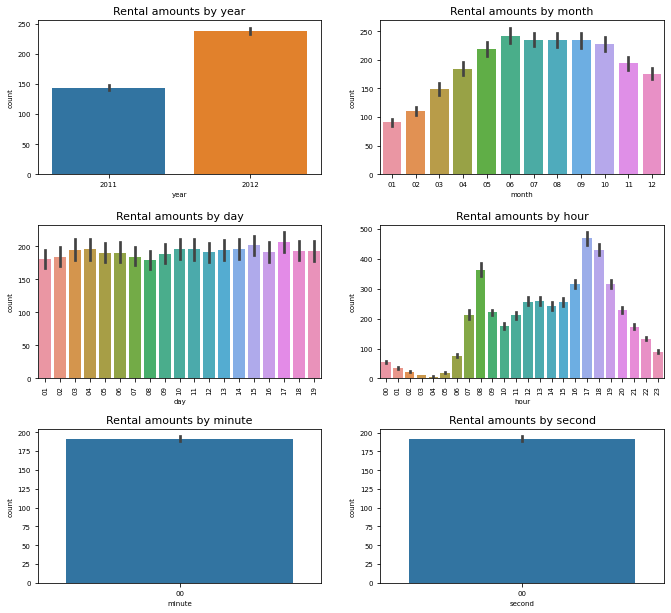

In [ ]:
mpl.rc('font', size=7) ; mpl.rc('axes', titlesize = 11)
fig, axes = plt.subplots(3,2, figsize=(10, 9)) 
plt.tight_layout(5)  # 그래프 사이 여백 확보

# 스탭 2 : 각 축에 서브플롯 할당
sns.barplot(x='year', y='count', data= train, ax=axes[0,0],)
sns.barplot(x='month', y='count', data= train, ax=axes[0,1])
sns.barplot(x='day', y='count', data= train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data= train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data= train, ax=axes[2,0])
sns.barplot(x='second', y='count', data= train, ax=axes[2,1])

# 스탭 3 : 세부 설정
# 서브플롯에 제목 달기
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

> 박스플롯

boxplot()

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,NaN,0,0,NaN,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,NaN,0,0,NaN,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,NaN,0,0,NaN,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,NaN,0,0,NaN,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,NaN,0,0,NaN,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


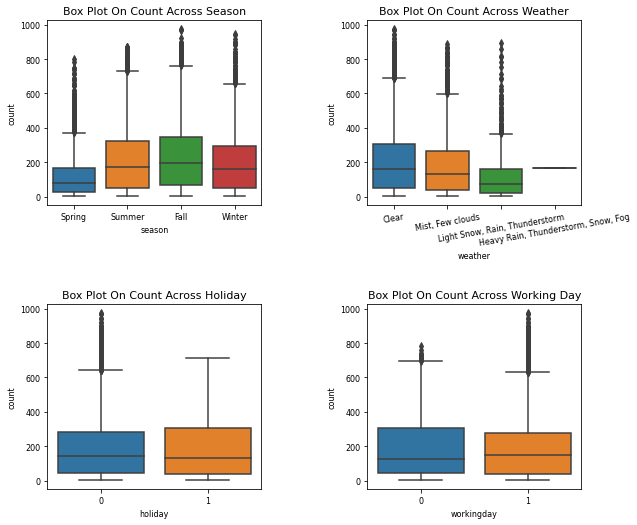

In [ ]:
mpl.rc('font', size=8) ; mpl.rc('axes', titlesize = 11)
fig, axes = plt.subplots(2,2 , figsize=(10,9))
plt.tight_layout(10)

sns.boxplot(x = 'season', y='count', data=train, ax = axes[0,0])
sns.boxplot(x = 'weather', y='count', data=train, ax = axes[0,1])
sns.boxplot(x = 'holiday', y='count', data=train, ax = axes[1,0])
sns.boxplot(x = 'workingday', y='count', data=train, ax = axes[1,1])

axes[0,0].set(title= 'Box Plot On Count Across Season')
axes[0,1].set(title= 'Box Plot On Count Across Weather')
axes[1,0].set(title= 'Box Plot On Count Across Holiday')
axes[1,1].set(title= 'Box Plot On Count Across Working Day')

axes[0,1].tick_params(axis='x', labelrotation=10)

# 분석결과 : 자전거 대여 수량은 봄에 가장 적고 가을에 높다
# 분석결과 : 우리의 직관과 같이 맑은 날에 가장 렌탈수가 많음
# 분석결과 : 평일과 공휴일에 대여수량은 비슷한데 평일이 이상치가 많다. 
# 분석결과 : 공휴일그래프와 비슷

> 포인트 플롯

pointplot()

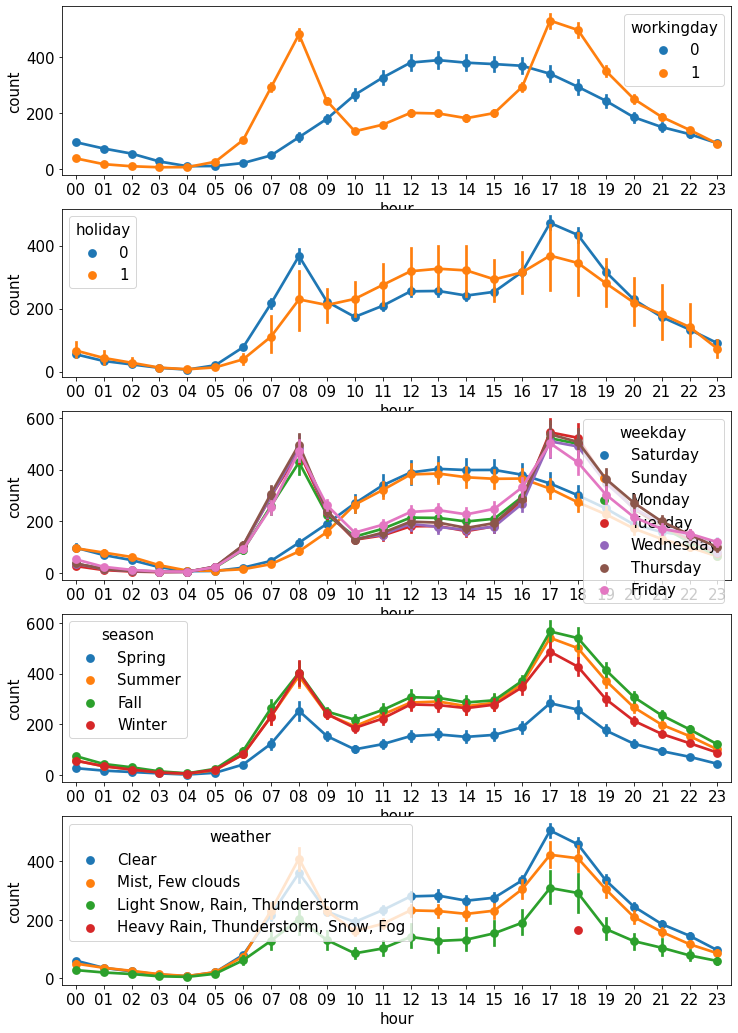

In [ ]:
fig, axes = plt.subplots(5,1, figsize=(12,18))

sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'holiday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weekday', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'season', ax = axes[3])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weather', ax = axes[4])

# 1 번 그래프를 보면 근무일에는 출퇴근 때 수요가 많고 휴일에는 12~2시 사이에 많다
# 2 번, 3 번 그래프를 보면 비슷한 양상을 보인다
# 4번 그래프를 보면 가을에 가장 많고 봄에 가장 적다
# 5번 그래프를 보면 날씨가 클린 할 때 가장 많다
# 빨간 점은 이상치다 제거를 하면 성능이 오른다고 한다 (= weather 에서 4를 제거해도 무방) 

> 회귀선

regplot()

수치형 데이터의 상관관계를 볼 때

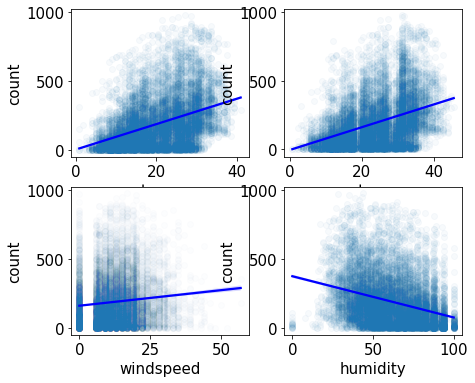

In [ ]:
mpl.rc('font', size = 15)
fig, axes = plt.subplots(2,2, figsize=(7,6))

sns.regplot(x='temp', y='count', data= train, ax=axes[0,0], scatter_kws={'alpha':0.03}, line_kws={'color':'blue'})
sns.regplot(x='atemp', y='count', data= train, ax=axes[0,1], scatter_kws={'alpha':0.03}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='count', data= train, ax=axes[1,0], scatter_kws={'alpha':0.01}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y='count', data= train, ax=axes[1,1], scatter_kws={'alpha':0.03}, line_kws={'color':'blue'})

# 분석결과 : 온도와 체감온도가 높을 수록 수요가 많아짐
# 분석결과 : 직관적으로 생각했을 때 풍속이 강해지면 수요가 낮을거로 생각되지만 결과는 반대다
# 이는 windspeed 에 결측값(0)이 많기 때문이다. 결측측값이 많을 때는 보통 다른 값으로 대체하거나 삭제한다.
# 분석결과 : 습도는 낮을 수록 수요가 올라간다

> 히트맵

heatmap()

In [ ]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


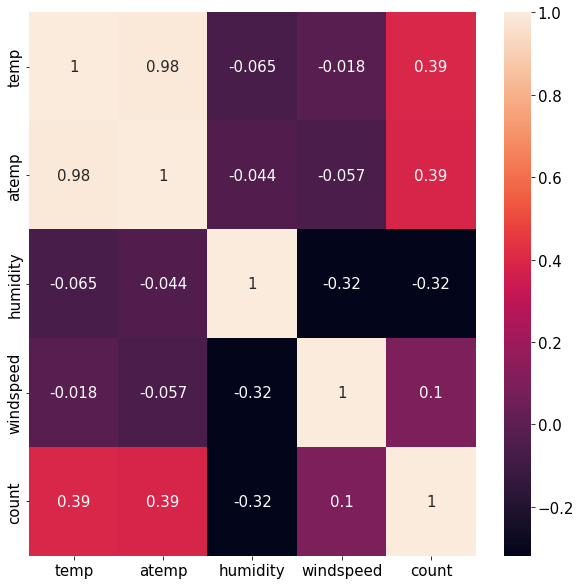

In [ ]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corrMat, annot=True)
plt.show()

# 분석결과
# 수량과 피쳐간의 상관도를 중점으로 보자
# 온도가 높을수록 수요가 많다
# 체감온도가 높을수록 수요가 많다
# 습도는 음수다. 즉 습도가 낮을수록 수요가 많다 
# 풍속과 수량의 상관도가 0.1로 낮다. 관계가 약해서 예측에 도움이 안될 것 같다